# EDA: Labeled Comments
Exploratory Data Analysis for Czech sentiment labeled dataset.

In [2]:
import sys, os
sys.path.append(os.path.abspath(".."))  # go up one level to project root

In [3]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from src.data_utils import load_labeled_comments

df = load_labeled_comments()
print(f"Loaded {len(df)} labeled comments.")

/Users/adrianvargas/.pyenv/versions/3.11.9/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded 8752 labeled comments.


## 2.1 Basic Info & Label Distribution

In [4]:
print(df.head())
print("\nDataset shape:", df.shape)

  label_str  label                                               text
0         0      1                                         co se děje
1         n      0  Jsem z nich na prášky...:-D :D ... se divím , ...
2         p      2                        Nejlepší bylo Bounty... :-)
3         0      1      :D Já jsem četla: z vlaku vypadl kluk Ruda :D
4         0      1                       a budou venku i v neděly?=O]

Dataset shape: (8752, 3)


In [5]:
print("Label counts:")
print(df["label"].value_counts())

print("\nLabel proportions (%):")
print((df["label"].value_counts(normalize=True) * 100).round(2))

Label counts:
label
1    4642
2    2318
0    1792
Name: count, dtype: int64

Label proportions (%):
label
1    53.04
2    26.49
0    20.48
Name: proportion, dtype: float64


/var/folders/lm/mg395mvd36g3fsqg6gjxv4r40000gn/T/ipykernel_31347/2771709173.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


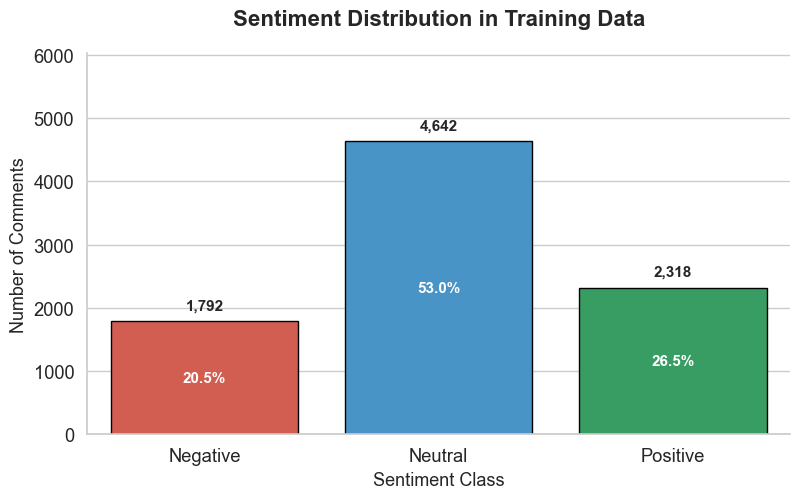

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
label_names = ['Negative', 'Neutral', 'Positive']
counts = df['label'].value_counts().sort_index()

# Professional style
sns.set_theme(style="whitegrid", font_scale=1.2)
palette = ['#e74c3c', '#3498db', '#27ae60']

# Create figure (wider & taller)
fig, ax = plt.subplots(figsize=(9, 6))

# Plot
bars = sns.barplot(
    x=label_names,
    y=counts.values,
    palette=palette,
    ax=ax,
    edgecolor='black'
)

# Titles and labels
ax.set_title('Sentiment Distribution in Training Data', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Sentiment Class', fontsize=13)
ax.set_ylabel('Number of Comments', fontsize=13)

# Annotate counts above bars & percentages inside bars
total = counts.sum()
for bar, value in zip(bars.patches, counts.values):
    height = bar.get_height()
    pct = value / total * 100
    # Count above bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + (max(counts.values) * 0.03),
        f"{value:,}",
        ha='center', va='bottom', fontsize=11, fontweight='semibold'
    )
    # % inside bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height * 0.5,
        f"{pct:.1f}%",
        ha='center', va='center', fontsize=11, color='white', fontweight='bold'
    )

# Adjust y-limit so nothing is cropped
ax.set_ylim(0, max(counts.values) * 1.3)

# Clean look
sns.despine(ax=ax, right=True, top=True)
plt.tight_layout(pad=3.0)
plt.show()

## 2.2 Length Statistics (Characters & Words)

In [ ]:
df["n_chars"] = df["text"].str.len()
df["n_words"] = df["text"].str.split().str.len()

print("Length statistics:")
print(df[["n_chars", "n_words"]].describe())

Length statistics:
           n_chars      n_words
count  8752.000000  8752.000000
mean     59.659849    10.772623
std      33.909790     6.114602
min       9.000000     1.000000
25%      31.000000     6.000000
50%      53.000000    10.000000
75%      84.000000    15.000000
max     140.000000    31.000000


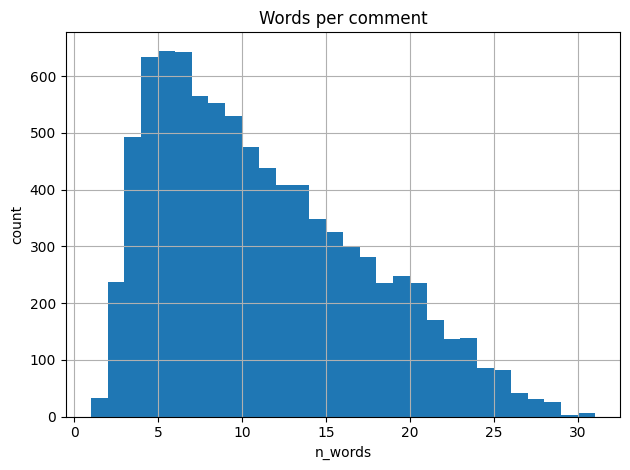

In [ ]:
df["n_words"].hist(bins=30)
plt.title("Words per comment")
plt.xlabel("n_words")
plt.ylabel("count")
plt.tight_layout()
plt.show()

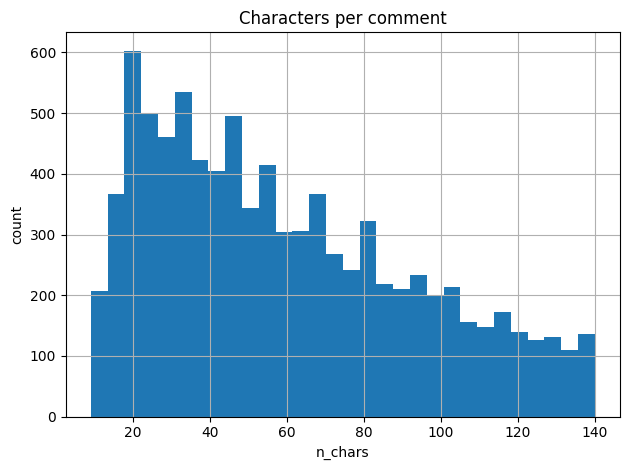

In [ ]:
df["n_chars"].hist(bins=30)
plt.title("Characters per comment")
plt.xlabel("n_chars")
plt.ylabel("count")
plt.tight_layout()
plt.show()

## 2.3 Diacritics, Uppercase, Emojis, URLs

In [ ]:
import re
import regex as re2  # pip install regex

CZECH_DIACRITICS = "áčďéěíňóřšťúůýžÁČĎÉĚÍŇÓŘŠŤÚŮÝŽ"

def has_diacritics(text: str) -> bool:
    return any(ch in CZECH_DIACRITICS for ch in text)

def has_upper(text: str) -> bool:
    return any(ch.isupper() for ch in text)

emoji_pattern = re2.compile(r"\p{Emoji}", re2.UNICODE)
url_pattern = re.compile(r"http[s]?://|www\.", re.IGNORECASE)
at_pattern = re.compile(r"@\w+")

df["has_diacritics"] = df["text"].apply(has_diacritics)
df["has_upper"] = df["text"].apply(has_upper)
df["has_emoji"] = df["text"].apply(lambda s: bool(emoji_pattern.search(s)))
df["has_url"] = df["text"].apply(lambda s: bool(url_pattern.search(s)))
df["has_mention"] = df["text"].apply(lambda s: bool(at_pattern.search(s)))

print(f"Has diacritics: {df['has_diacritics'].mean():.2%}")
print(f"Has uppercase: {df['has_upper'].mean():.2%}")
print(f"Has emoji: {df['has_emoji'].mean():.2%}")
print(f"Has URL: {df['has_url'].mean():.2%}")
print(f"Has @mention: {df['has_mention'].mean():.2%}")

Has diacritics: 90.21%
Has uppercase: 69.76%
Has emoji: 15.01%
Has URL: 0.54%
Has @mention: 0.31%


## 2.4 Class-Conditional Length Distributions

In [ ]:
print("Length by label:")
print(df.groupby("label")[["n_chars", "n_words"]].describe().round(1))

Length by label:
          n_chars                                            n_words        \
            count  mean   std  min   25%   50%    75%    max   count  mean   
label_str                                                                    
0          4642.0  60.2  33.9  9.0  31.0  54.0   84.0  140.0  4642.0  11.0   
n          1792.0  73.1  33.3  9.0  46.0  70.0  100.0  140.0  1792.0  13.1   
p          2318.0  48.3  30.2  9.0  24.0  40.0   65.0  140.0  2318.0   8.6   

                                            
           std  min  25%   50%   75%   max  
label_str                                   
0          6.1  1.0  6.0  10.0  15.0  30.0  
n          6.0  1.0  8.0  13.0  18.0  31.0  
p          5.5  1.0  4.0   7.0  12.0  30.0  


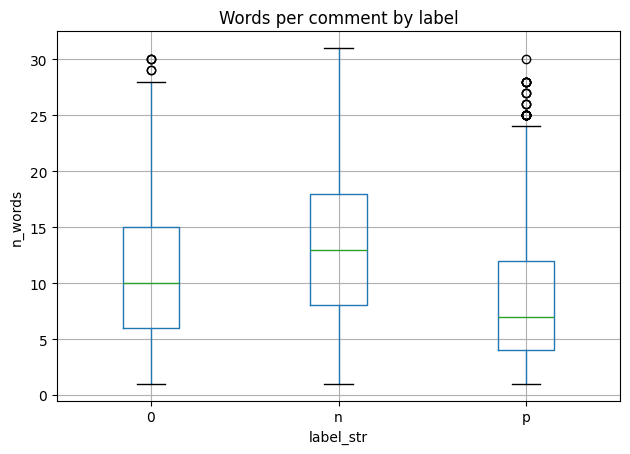

In [ ]:
df.boxplot(column="n_words", by="label_str")
plt.title("Words per comment by label")
plt.suptitle("")
plt.xlabel("label_str")
plt.ylabel("n_words")
plt.tight_layout()
plt.show()

## 2.5 Sample Examples per Label

In [ ]:
for lbl in ["n", "0", "p"]:
    print(f"\n==== Examples for label: {lbl} ====")
    sample = df[df["label_str"] == lbl].sample(5, random_state=42)
    for _, row in sample.iterrows():
        print("-", row["text"])


==== Examples for label: n ====
- zrovna ted jsem se dival na "tarify na miru" a chtit 177 kc za volani na jedno cislo je vysmech :D
- Abych já pravdu řekl tak 3D nemusím ale je to na vás jak se rozhodnete
- kurva od kdy je kofola slovensky napoj ?
- takže když dostanu blbý fusekle, tak už příště nemohu hrát????? To T- mobile myslí vážně????????
- jj ale pro zlin zadne nabidky,je to bida

==== Examples for label: 0 ====
- ja...bych byla pak za to aby se tie kody vraceli..kdyz to co chci je pryc.......
- Prosíííím poslala sem ve středu body, chci to pouzdro. Snad to stihnete..
- Jej, tak to bych vůbec neřekl, že to bude někdo z hereček, známých lidí... Zkusím se zaposlouchat, jestli tam tu Geislerku uslyším;)
- tak o brčka si máte říct :)
- Už funguje kolo štěstí ??

==== Examples for label: p ====
- kofola je nejlepší
- Jedna z nejlepších reklam, doufám, že se objeví i letos v televizi !
- už se těšim až se na ně pojedeme podívat
- Moc děkuji za odpověd:)
- Hodně štěstí děvčata.


## 2.6 Class Imbalance analysis

Check how balanced the dataset is.

In [ ]:
label_counts = df["label_str"].value_counts().sort_index()
print("Label distribution (absolute & %):")
for lbl in sorted(df["label_str"].unique()):
    count = (df["label_str"] == lbl).sum()
    pct = 100 * count / len(df)
    print(f"  {lbl}: {count:5d} ({pct:5.1f}%)")

negative_pct = 100 * (df["label_str"] == "n").sum() / len(df)
print(f"\nCurrent negative proportion: {negative_pct:.1f}%")


Label distribution (absolute & %):
  0:  4642 ( 53.0%)
  n:  1792 ( 20.5%)
  p:  2318 ( 26.5%)

Current negative proportion: 20.5%
Alert threshold (30%): would not trigger


## 2.7 Czech Language Specifics & Tokenizer Compatibility

Check for language-specific patterns (diacritics preservation, lowercasing) that affect ELECTRA tokenizer.

In [ ]:
# Check diacritics preservation (ELECTRA model is trained on lowercased Czech with diacritics)
has_diacritics_pct = 100 * df["has_diacritics"].sum() / len(df)
has_lowercase_needed = (df["text"].str.len() > 0) & (df["text"].str.lower() != df["text"])
print(f"Comments with diacritics: {has_diacritics_pct:.1f}%")
print(f"Comments with uppercase (need lowercasing): {100 * has_lowercase_needed.sum() / len(df):.1f}%")

# Sample diacritical texts
print("\nSample comment with diacritics:")
sample_diacritic = df[df["has_diacritics"]].iloc[0]["text"] if df["has_diacritics"].any() else "N/A"
print(f"  {sample_diacritic}")

Comments with diacritics: 90.2%
Comments with uppercase (need lowercasing): 69.8%

Sample comment with diacritics:
  co se děje


## 2.8 Data Quality & Preprocessing Checks

Identify potential data cleaning issues for the model input.

In [ ]:
# Check for duplicates
n_duplicates = df["text"].duplicated().sum()
print(f"Duplicate comments: {n_duplicates} ({100*n_duplicates/len(df):.2f}%)")

# Check for missing/empty values
n_missing = df["text"].isna().sum()
n_empty = (df["text"].str.len() == 0).sum()
print(f"Missing text values: {n_missing}")
print(f"Empty comments: {n_empty}")

# Check for extreme lengths 
max_len = df["n_words"].max()
percentile_99 = df["n_words"].quantile(0.99)
print(f"\nMax words in a comment: {max_len}")
print(f"99th percentile words: {percentile_99:.0f}")

if max_len > 128:
    print("⚠️ WARNING: Some comments exceed ELECTRA's max_position_embeddings (128 tokens)")
    n_over_512 = (df["n_words"] > 128).sum()
    print(f"   {n_over_128} comments may need truncation")

Duplicate comments: 0 (0.00%)
Missing text values: 0
Empty comments: 0

Max words in a comment: 31
99th percentile words: 26


## 2.9 Negative Comment Patterns (for alerting logic)

Explore characteristics of negative comments to inform model refinement and threshold tuning.

In [ ]:
# Compare feature presence across labels
print("Feature presence by label (% of comments):")
feature_cols = ["has_emoji", "has_url", "has_mention", "has_upper"]
for feat in feature_cols:
    print(f"\n{feat}:")
    for lbl in sorted(df["label_str"].unique()):
        pct = 100 * df[df["label_str"] == lbl][feat].mean()
        print(f"  {lbl}: {pct:.1f}%")

# Negative comments tend to be longer/shorter?
print("\n\nAverage length by label:")
for lbl in sorted(df["label_str"].unique()):
    avg_words = df[df["label_str"] == lbl]["n_words"].mean()
    print(f"  {lbl}: {avg_words:.1f} words")

Feature presence by label (% of comments):

has_emoji:
  0: 17.4%
  n: 18.1%
  p: 7.8%

has_url:
  0: 0.9%
  n: 0.3%
  p: 0.0%

has_mention:
  0: 0.4%
  n: 0.3%
  p: 0.2%

has_upper:
  0: 72.6%
  n: 70.9%
  p: 63.1%


Average length by label:
  0: 11.0 words
  n: 13.1 words
  p: 8.6 words


## 2.10 Train/Val Split Considerations

Suggest a safe split strategy and check label distribution across splits.

In [ ]:
from sklearn.model_selection import train_test_split

# Stratified split to maintain label distribution
train_size = 0.8
train_df, val_df = train_test_split(
    df, test_size=1-train_size, random_state=42, stratify=df["label_str"]
)

print(f"Train set: {len(train_df)} samples")
print(f"Val set: {len(val_df)} samples")

print("\nTrain label distribution:")
print(train_df["label_str"].value_counts(normalize=True).sort_index() * 100)

print("\nVal label distribution:")
print(val_df["label_str"].value_counts(normalize=True).sort_index() * 100)

print("\n Stratified split maintains label proportions across train/val")

Train set: 7001 samples
Val set: 1751 samples

Train label distribution:
label_str
0    53.035281
n    20.482788
p    26.481931
Name: proportion, dtype: float64

Val label distribution:
label_str
0    53.055397
n    20.445460
p    26.499143
Name: proportion, dtype: float64

✅ Stratified split maintains label proportions across train/val
